In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#Load Dataset
data=pd.read_csv('./cannabisGrowthRaw2020.csv')

In [3]:
#list of missing values in the data
mising = ["?", "none"]
data=pd.read_csv("./cannabisGrowthRaw2020.csv", na_values = mising)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 10 columns):
PMCno       1458 non-null float64
DBH         1470 non-null float64
Ht          1470 non-null float64
Surv        1284 non-null float64
Vig         1334 non-null float64
Ins_res     1334 non-null float64
Stem_Fm     1334 non-null float64
Crown_Fm    1334 non-null float64
Brnch_Fm    1334 non-null float64
Utility     1112 non-null object
dtypes: float64(9), object(1)
memory usage: 115.1+ KB


In [5]:
data.head()

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,1642.0,20.0,11.0,43.0,4.0,3.0,4.0,4.0,4.0,good
1,1606.0,14.0,10.0,97.0,5.0,4.0,4.0,4.0,3.0,best
2,1471.0,11.0,7.0,54.0,2.0,3.0,3.0,4.0,3.0,low
3,1724.0,16.0,10.0,76.0,4.0,3.0,4.0,4.0,4.0,good
4,2255.0,16.0,12.0,97.0,4.0,3.0,4.0,3.0,3.0,good


In [6]:
#Summary of N/A Values
data.isnull().sum()

PMCno        14
DBH           2
Ht            2
Surv        188
Vig         138
Ins_res     138
Stem_Fm     138
Crown_Fm    138
Brnch_Fm    138
Utility     360
dtype: int64

In [7]:
#data cleaning using case deletion
data1 = data.dropna()

In [8]:
#removing PMCNO coloumn from the data.
data2=data1.drop('PMCno',axis=1)

In [9]:
#Visualization of All Variables
#pairplot = sns.pairplot(data2, hue="Utility")
#pairplot

In [10]:
data2.corr()

,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm
DBH,1.000000,0.078525,-0.038375,0.029540,0.052259,-0.005266,0.016038,-0.016465
Ht,0.078525,1.000000,-0.247667,0.484807,0.291635,0.227196,0.090726,-0.146722
Surv,-0.038375,-0.247667,1.000000,0.105041,-0.218819,0.017697,-0.011449,0.085987
Vig,0.029540,0.484807,0.105041,1.000000,0.413326,0.247700,-0.002384,-0.167087
Ins_res,0.052259,0.291635,-0.218819,0.413326,1.000000,0.175588,0.125706,-0.031176
Stem_Fm,-0.005266,0.227196,0.017697,0.247700,0.175588,1.000000,0.664462,0.594891
Crown_Fm,0.016038,0.090726,-0.011449,-0.002384,0.125706,0.664462,1.000000,0.718249
Brnch_Fm,-0.016465,-0.146722,0.085987,-0.167087,-0.031176,0.594891,0.718249,1.000000


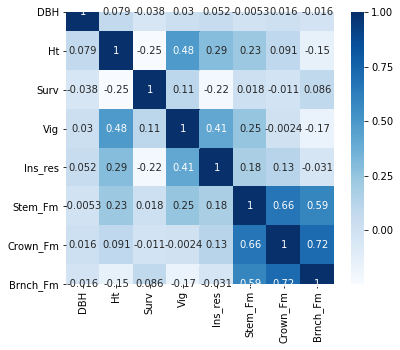

In [11]:
#Visualization of Correlations
import seaborn as sns
f, ax = plt.subplots(figsize =(6, 5)) 
sns.heatmap(data2.corr(),annot=True, ax = ax,cmap="Blues")

In [12]:
#Identify Correlated Columns
def correlation(dataset,threshold):
    col_corr=set() # set will contains unique values.
    corr_matrix=dataset.corr() #finding the correlation between columns.
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking the correlation between columns.
                colName=corr_matrix.columns[i] #getting the column name
                col_corr.add(colName) #adding the correlated column name heigher than threshold value.
    return col_corr #returning set of column names
col=correlation(data2.drop('Utility',axis=1),0.6)
print('Correlated columns:',col) 

Correlated columns: {'Crown_Fm', 'Brnch_Fm'}


In [13]:
#Create x and y variables
x = data2.drop('Utility', axis=1).values
y = data2['Utility'].values

In [14]:
#Prepare for Models for Comparison

#Load Library for Training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify=y,random_state = 100)

In [15]:
#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)


In [16]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train_smt)
x_test2 = sc.fit_transform(x_test)

x_2 = sc.fit_transform(x)




In [17]:
#DECISION TREE CLASSIFICATION ALGORITHM
#Import Model
from sklearn.tree import DecisionTreeClassifier  

# Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('clf', DecisionTreeClassifier(random_state=100))])

In [18]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train, 
                                                            y=y_train,
                                                            cv=10,
                                                            train_sizes=np.linspace(.1,1,10),
                                                            scoring='accuracy',
                                                            n_jobs=1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.0, 1.01])
    plt.show()

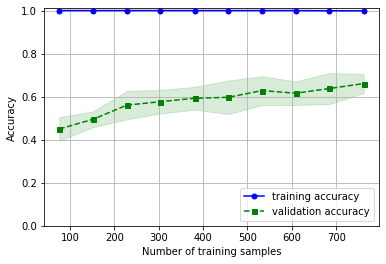

In [19]:
#Plot Learning Curve
plot_learning_curves(pipe_dt)

In [20]:

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_colwidth', -1) 

# Set grid search params 

max_depth = range(1,100)
param_griddt = {'clf__criterion':['gini','entropy'],
                'clf__max_depth':max_depth}

#Optimize Model
cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
opt_dt = GridSearchCV(estimator=pipe_dt, param_grid=param_griddt,
                       cv=cv2, verbose=0,scoring='accuracy',n_jobs=-1)

# List of pipelines for ease of iteration 
grids = [opt_dt] 

# Dictionary of pipelines and classifier types for ease of reference 
grid_dict = {0:'dt'}

#Create Dataframe for MLA Analysis
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for idx, gs in enumerate(grids):
    
    #Fit grid search
    gs.fit(x_train, y_train)
    
    # Nested CV
    scoresNestedPre = cross_val_score(gs, x_2, y, 
                             scoring='precision_weighted', cv=5,
                             n_jobs= -1)
    
    scoresNestedRec = cross_val_score(gs, x_2, y, 
                             scoring='recall_weighted', cv=5,
                             n_jobs= -1)
    
    #Create Dataframe to Compare Models
    MLA_compare.loc[row_index,'Algorithm Name'] = grid_dict[idx]
    MLA_compare.loc[row_index,'Train Accuracy'] = round(gs.best_score_, 2)
    MLA_compare.loc[row_index,'Precision-NestedCV'] = str('{:0.2f} +/- {:0.2f} '.format(np.mean(scoresNestedPre),
                                                                           np.std(scoresNestedPre)))
    MLA_compare.loc[row_index,'Recall-NestedCV'] = str('{:0.2f} +/- {:0.2f} '.format(np.mean(scoresNestedRec),
                                                                           np.std(scoresNestedRec)))
    
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(gs.best_params_)     
    row_index+=1
    
MLA_compare.sort_values(by = ['Precision-NestedCV'], ascending = False, inplace = True)    
MLA_compare

,Algorithm Name,Train Accuracy,Precision-NestedCV,Recall-NestedCV,MLA Parameters
0,dt,0.66,0.68 +/- 0.02,0.68 +/- 0.02,"{'clf__criterion': 'gini', 'clf__max_depth': 9}"


In [21]:
#Feature Importance - optimized
for name, score in zip(list(data2),opt_dt.best_estimator_.named_steps['clf'].feature_importances_):
    print(name, round(score,2))

DBH 0.13
Ht 0.16
Surv 0.13
Vig 0.31
Ins_res 0.08
Stem_Fm 0.05
Crown_Fm 0.09
Brnch_Fm 0.05


In [25]:
#Prepare Models - Linear, Lasso, Ridge and Elastic-net 
import xgboost as xgb
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

models = [LogisticRegression(),RandomForestClassifier(random_state=100),
          BaggingClassifier(random_state=100),
          AdaBoostClassifier(random_state =100),
          GradientBoostingClassifier(random_state=100),XGBClassifier(random_state=100),
          LGBMClassifier(objective='binary',random_state=100)]



In [26]:
#Create Model Comparison
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

#Scoring Parameters
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro'}

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in models:    
    rkfcv = alg.fit(x_train2,y_train_smt)
    rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    rKFcv = cross_validate(rkfcv, x_2, y, scoring=scoring,
                         cv=rkf)
                            
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Algorithm Name'] = MLA_name
    MLA_compare.loc[row_index,'Precision'] = round(rKFcv['test_prec_macro'].mean(),2)
    MLA_compare.loc[row_index,'Recall'] = round(rKFcv['test_rec_macro'].mean(),2)
    
    row_index+=1
    
MLA_compare.sort_values(by = ['Precision'], ascending = False, inplace = True)    
MLA_compare

C:\Users\sibin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sibin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sibin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sibin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sibin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\sibin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sibin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sibin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sibin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sibin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

,Algorithm Name,Precision,Recall
5,XGBClassifier,0.74,0.72
6,LGBMClassifier,0.73,0.71
2,BaggingClassifier,0.71,0.70
1,RandomForestClassifier,0.70,0.69
4,GradientBoostingClassifier,0.70,0.67
0,LogisticRegression,0.62,0.55
3,AdaBoostClassifier,0.54,0.57
